In [55]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
data = pd.read_csv('../data/raw/plays.csv')
data.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [58]:
print(data.columns)

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

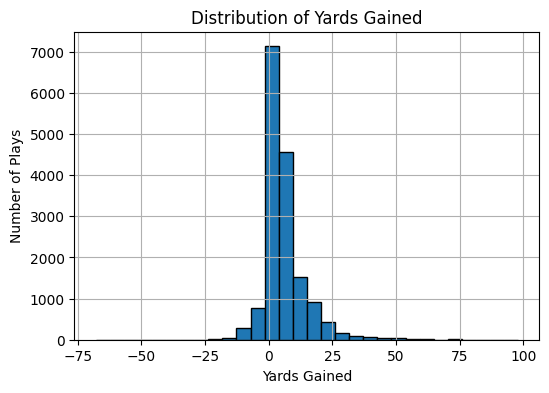

In [59]:
plt.figure(figsize=(6, 4))
plt.hist(data['yardsGained'], bins=30, edgecolor='black')
plt.title('Distribution of Yards Gained')
plt.xlabel('Yards Gained')
plt.ylabel('Number of Plays')
plt.grid(True)
plt.show()

### Distribution of Yards Gained

From this histogram, its clear to see that the majority of yardsGained values fall in the (-1,4) range. This checks out with the nature of football, where most plays result in modest gains, and bigger plays are much harder to attain. 

On the right side of the distribution, there's a long tail that has much more visible variation than the left side. The (4,9), (9,14), and (14,19) bins all are significantly sized. This represents the sport of football quite well, where there are less frequent "big" plays, but are very impactful  when they do occur. This is most likely due to well-executed offense and defense breakdowns.

On the left side of the distribution, there's a much shorter tail. This represents rare incidents like blown-up plays, sacks, fumbles, etc. It typically doesn't extend much past the (-20,-25) bin as quarterbacks/teams as quarterbacks are in much more control of not giving up too much, by simply throwing the ball out of play or deliberately taking smaller losses to avoid big setbacks.

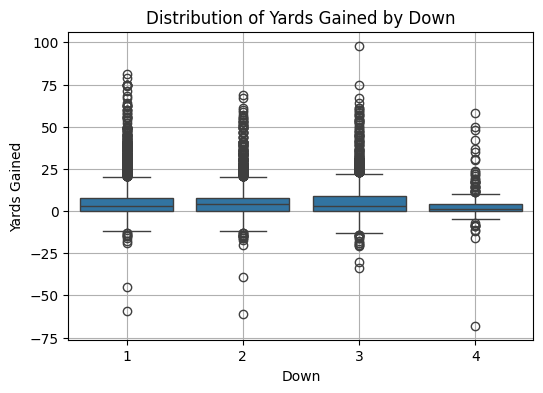

In [60]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='down', y='yardsGained', data=data)
plt.title('Distribution of Yards Gained by Down')
plt.xlabel('Down')
plt.ylabel('Yards Gained')
plt.grid(True)
plt.show()

### Distribution of Yards Gained By Down
From the boxplot, we can see that downs 1 and 2 have nearly identical IQR's, medians, and whiskers. It represents that playcalling is fairly consistent between these two downs. The third down has a wider IQR and higher upper whisker, indicating that teams are more likely to try and gain more here, resulting in more aggressive playcalling. In this scenario, they may be trying to go for higher-yardage plays, or on the defensive side, they may be intentionally allowing more yards by playing a softer coverage, in order to ensure that they don't get the next down. Last, the fourth plot is the most interesting. The IQR and whiskers are a lot tighter in this plot, which signifies teams that are just trying to get plays across the line to get to the next down.

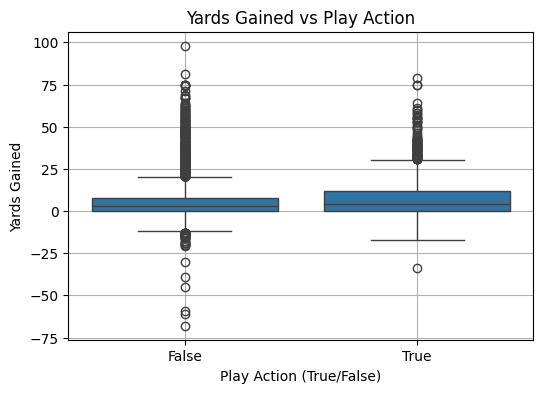

In [61]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='playAction', y='yardsGained', data=data)
plt.title('Yards Gained vs Play Action')
plt.xlabel('Play Action (True/False)')
plt.ylabel('Yards Gained')
plt.grid(True)
plt.show()

### Yards Gained by Play Action
This plot yields some valuable insights as well. The no play action plot has a skinny IQR in the (0,5) range with a ~ 2 yard median. The IQR range is also skinner between (-12, 23). Its clear to see from the play action plot, that the IRQ is a lot more varied between (-20, 28). Median is around ~ 4 yards. This yields that play action calls typically results in higher yards, but also leads to more negatige variation.

An important thing to note, is that the no play action calls have significant negative outliers, and a wider and thick range of positive outliers. Which indicates that those plays are more likely to go awry, but still have the potential to be big plays. The play action call notably has one negative outlier, with a tigther grouping of positve outliers.

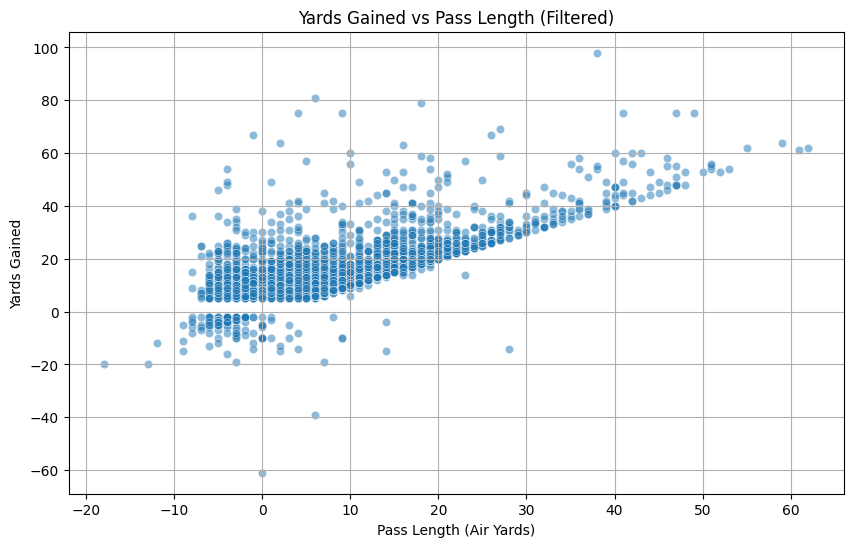

Correlation between passLength and yardsGained: 0.697


In [62]:
filtered_df = data[(data['yardsGained'] < -1) | (data['yardsGained'] > 4)]

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='passLength',
    y='yardsGained',
    data=filtered_df,
    alpha=0.5
)
plt.title('Yards Gained vs Pass Length (Filtered)')
plt.xlabel('Pass Length (Air Yards)')
plt.ylabel('Yards Gained')
plt.grid(True)
plt.show()

correlation = filtered_df['passLength'].corr(filtered_df['yardsGained'])

print(f"Correlation between passLength and yardsGained: {correlation:.3f}")

### Understanding relationship between yardsGained and passLength
In this scatterplot, we dropped out routine/short plays (-1,4) (this was the range removed as it was the most common bin in the histogram), to see if there's any relationship between passLength and big plays. If we didn't remove this data, the graph would be too cluttered to make out if any value was gained with longer passLengths. From this scatterplot, its clear to see that there is a strong postive correlation between pass length and yards gained (.697). Its important to note, that while there seems to be a general trend of more yards to be gained with longer pass lengths, we cannot generalize this to the rest of the dataset due to this filtering.

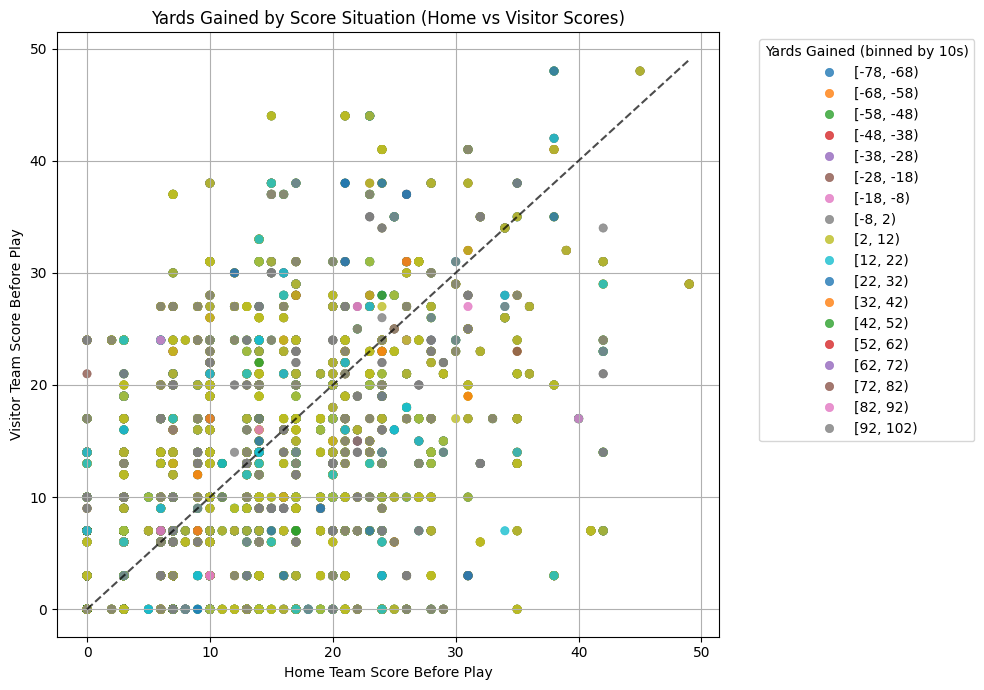

In [63]:
bins = range(int(data['yardsGained'].min()) - 10, int(data['yardsGained'].max()) + 10, 10)
data['yardsGained_bin'] = pd.cut(data['yardsGained'], bins=bins, right=False)

plt.figure(figsize=(10, 7))

scatter = sns.scatterplot(
    x='preSnapHomeScore',
    y='preSnapVisitorScore',
    hue='yardsGained_bin',
    palette='tab10', 
    data=data,
    alpha=0.8,
    edgecolor=None,
)

lims = [
    np.min([data['preSnapHomeScore'].min(), data['preSnapVisitorScore'].min()]),
    np.max([data['preSnapHomeScore'].max(), data['preSnapVisitorScore'].max()])
]
plt.plot(lims, lims, 'k--', alpha=0.7)

plt.title('Yards Gained by Score Situation (Home vs Visitor Scores)')
plt.xlabel('Home Team Score Before Play')
plt.ylabel('Visitor Team Score Before Play')

plt.grid(True)
plt.legend(title='Yards Gained (binned by 10s)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Relationship between Team Scores and Yards Gained
In this scatterplot, we look at the pre-snap scores of the home and visiting teams. We also added a line y = x to represent the situations where the game is tied/close. With this graph, we can discern two particularly interesting insights.

1) The closer the point is to the line, the more likely it will result in shorter plays, as seen by the majority green points along the line. 
2) The farther the point is away from the line, there is more potential for bigger/more explosive plays including pretty drastic loss of yard. All the different colors can be seen the farther you go away from the y = x line. 

Succintly put, as the score disparity increase, play outcomes can become less predictable/more extreme.